In [2]:
import matplotlib
from biopandas.mol2 import PandasMol2
from glob import glob
import os.path as osp
from tqdm import tqdm
import seaborn as sbn

In [3]:
data_path = '../data/raw'
ligands_path = osp.join(data_path, '*', '*_ligand.mol2')
list_ligands = glob(ligands_path)
print(len(list_ligands), "ligands")

19443 ligands


In [4]:
list_number_atoms_with_H = []
list_number_atoms_withOUT_H = []
for ligand_path in tqdm(list_ligands):
    pmol = PandasMol2().read_mol2(ligand_path)
    list_number_atoms_with_H += [pmol.df.shape[0]]
    list_number_atoms_withOUT_H += [pmol.df[pmol.df['atom_type'] != 'H'].shape[0]]

100%|██████████| 19443/19443 [00:29<00:00, 653.70it/s]


### Mean number of atoms per ligand

[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of ligand'),
 Text(0.5, 1.0, 'Mean number of atoms per ligand')]

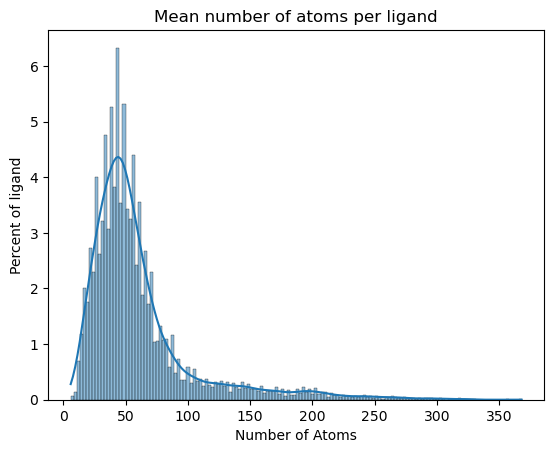

In [5]:
ax = sbn.histplot(data=list_number_atoms_with_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of ligand',
       title='Mean number of atoms per ligand')

### Mean number of atoms per ligand Without H

[Text(0.5, 0, 'Number of Atoms'),
 Text(0, 0.5, 'Percent of ligand'),
 Text(0.5, 1.0, 'Mean number of atoms per ligand Without H')]

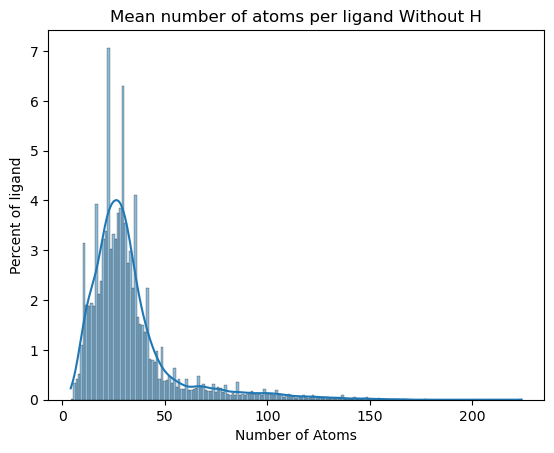

In [6]:
ax = sbn.histplot(data=list_number_atoms_withOUT_H, stat='percent', kde=True)
ax.set(xlabel='Number of Atoms',
       ylabel='Percent of ligand',
       title='Mean number of atoms per ligand Without H')